<img src = 'logo.png' width ='500'>

<center><h1><span style='color:cornflowerblue'>   DÉTECTION DE FAUX BILLETS</span></h1></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('billets.csv', sep =';')

<h2><span style="color:cornflowerblue"> 0. Aperçu des données </span></h2>

In [3]:
# Aperçu

data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
# Valeurs manquantes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
# Doublons

data.duplicated().sum()

0

<h2><span style="color:cornflowerblue"> 1. Nettoyage des données </span></h2>

In [6]:
# Séparation de données manquantes

data_miss = data[pd.isnull(data.margin_low)]
data_full = data.dropna()

In [7]:
# x_test

x_test_faux = data_miss[data_miss.is_genuine == False].drop(['is_genuine','margin_low'], axis = 1)
x_test_vrai = data_miss[data_miss.is_genuine == True].drop(['is_genuine','margin_low'], axis = 1)

x_test_faux.shape, x_test_vrai.shape

((8, 5), (29, 5))

In [8]:
# x_train & y_train

x_train_faux = data_full[data_full.is_genuine == False].drop(['is_genuine','margin_low'], axis = 1)
x_train_vrai = data_full[data_full.is_genuine == True].drop(['is_genuine','margin_low'], axis = 1)

y_train_faux = data_full[data_full.is_genuine == False]['margin_low']
y_train_vrai = data_full[data_full.is_genuine == True]['margin_low']

x_train_faux.shape, x_train_vrai.shape, y_train_faux.shape, y_train_vrai.shape

((492, 5), (971, 5), (492,), (971,))

In [9]:
# Normalisation des données

scaler = StandardScaler()

x_train_faux_norm = scaler.fit_transform(x_train_faux)
x_train_vrai_norm = scaler.fit_transform(x_train_vrai)

x_test_faux_norm = scaler.transform(x_test_faux)
x_test_vrai_norm = scaler.transform(x_test_vrai)

In [10]:
# Prédiction de valeurs manquantes des faux billets

lr = LinearRegression()
lr.fit(x_train_faux_norm, y_train_faux)

prediction_faux = lr.predict(x_test_faux_norm)
prediction_faux

array([5.31238615, 5.32368613, 5.40957942, 5.41610902, 5.13392601,
       5.2408465 , 5.06439644, 5.28512628])

In [11]:
# Prédiction de valeurs manquantes des vrai billets

lr = LinearRegression()
lr.fit(x_train_vrai_norm, y_train_vrai)

prediction_vrai = lr.predict(x_test_vrai_norm)
prediction_vrai

array([4.06542749, 4.11404761, 4.13311635, 4.03501851, 4.09387695,
       4.08159287, 4.09513499, 4.12611241, 4.11049199, 4.09544665,
       4.10710194, 4.17684255, 4.14906315, 4.05685798, 4.12786563,
       4.15924515, 4.09846281, 4.08486851, 4.1031968 , 4.13074695,
       4.15539216, 4.13894295, 4.15805537, 4.09086845, 4.13689381,
       4.16654165, 4.09741216, 4.09086659, 4.12789199])

In [12]:
# Remplacement de valeurs manquantes

data.loc[x_test_faux.index,'margin_low']= prediction_faux
data.loc[x_test_vrai.index,'margin_low']= prediction_vrai

In [13]:
# Données finales

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


<h2><span style="color:cornflowerblue"> 2. Analyse exploratoire </span></h2>

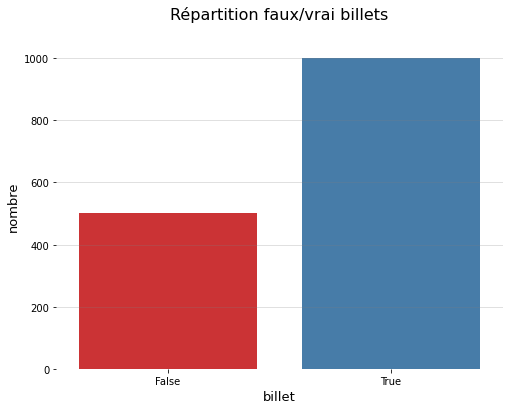

In [14]:
# Nombre de chaque classe

fig = plt.figure(figsize =(8,6))


fig.add_subplot(111)
plt.box(False)
plt.grid('whitegrid', color ='gray', alpha = 0.3)
sns.countplot(x = data.is_genuine, palette ='Set1')
plt.title('Répartition faux/vrai billets\n', size = 16)
plt.ylabel('nombre', size = 13)
plt.xlabel('billet', size = 13);

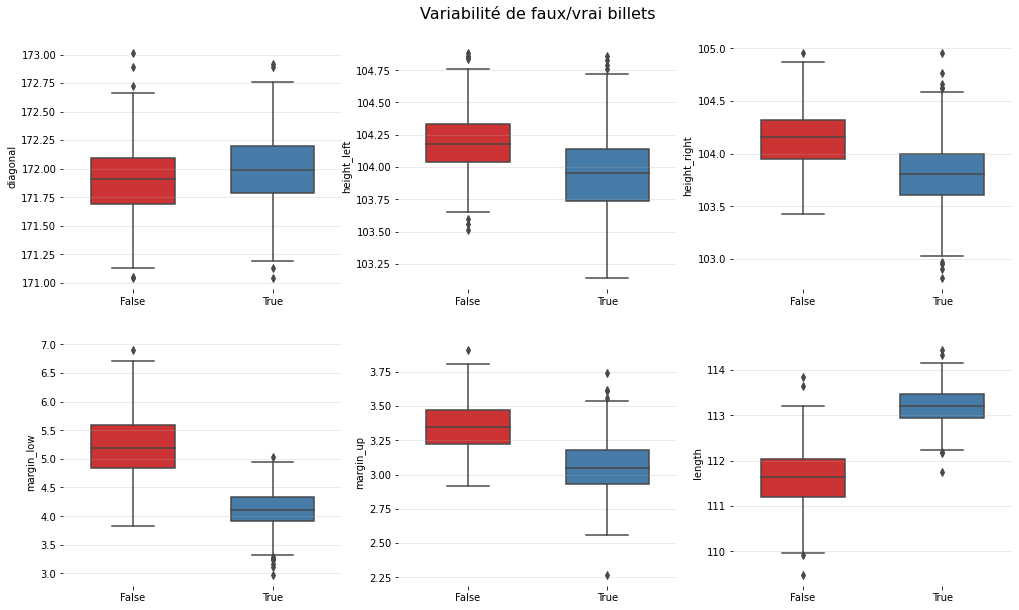

In [15]:
# Variabilité

fig = plt.figure(figsize=(17,10))
plt.title('Variabilité de faux/vrai billets\n', size = 16)
plt.box(False)
plt.yticks([])
plt.xticks([])

for i, j in zip (range(1,7), data.columns[1:]):
    fig.add_subplot(2,3,i)
    plt.box(False)
    plt.grid('whitegrid', alpha = 0.3)
    sns.boxplot(x ='is_genuine', y = j, data = data, palette = 'Set1', width = 0.6)
    plt.xlabel('');

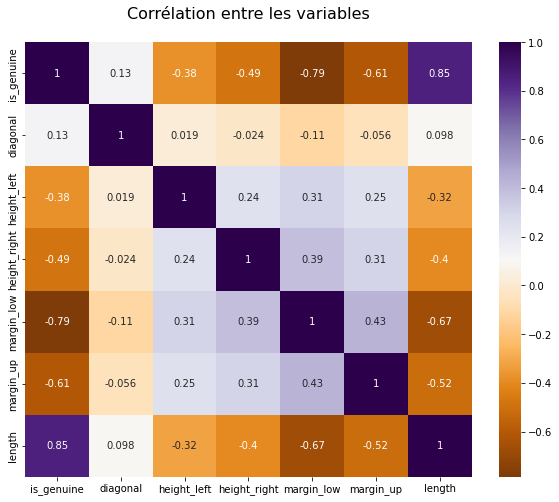

In [16]:
fig = plt.figure(figsize=(10,8))
plt.xticks([])
plt.yticks([])

plt.title('Corrélation entre les variables\n', size = 16)
sns.heatmap(data.corr(), annot = True, cmap ='PuOr');

<h2><span style="color:cornflowerblue"> 3. Classification automatique k-means </span></h2>

In [17]:
# Normalisation des données

x_norm = data.drop('is_genuine', axis = 1)

scaler = StandardScaler()
x_norm = scaler.fit_transform(x_norm)

data_norm = pd.merge(data['is_genuine'], pd.DataFrame(x_norm, columns = data.iloc[:,1:].columns), 
                     left_index=True, right_index=True)   
data_norm.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,-0.486540,2.774123,3.163240,0.056101,-1.128325,0.173651
1,True,-1.633729,-2.236535,-0.799668,-1.080330,-0.696799,0.471666
2,True,2.397823,1.504756,-1.291191,-0.125728,-0.912562,0.551901
3,True,-1.961498,-0.399294,0.060498,-1.307616,-0.610494,0.953075
4,True,-0.748754,0.836669,-1.414072,-0.671215,1.417677,-0.158750


In [18]:
# Séparation des données

x_train, x_test, y_train, y_test = train_test_split(x_norm, data_norm.is_genuine, test_size=0.2, random_state = 712)

In [19]:
# kmeans

kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans.fit(x_train)

y_pred_kmeans = kmeans.predict(x_test)

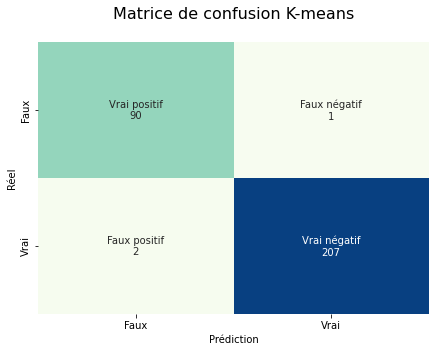

In [20]:
# évaluation

cf_matrix_kmeans = confusion_matrix(y_test, y_pred_kmeans)

nom = ['Vrai positif', 'Faux négatif', 'Faux positif', 'Vrai négatif']
chiffre = ['{0:0.0f}'.format(i) for i in cf_matrix_kmeans.flatten()]
labels = [f"{n}\n{c}" for n, c in zip(nom, chiffre)]
labels = np.asarray(labels).reshape(2,2)

figure = plt.figure(figsize=(7,5))
plt.title('Matrice de confusion K-means\n', size = 16)
sns.heatmap(confusion_matrix(y_test, y_pred_kmeans), annot = labels, fmt = '',cmap = 'GnBu',
            cbar = False, xticklabels = ["Faux","Vrai"], yticklabels=["Faux","Vrai"])
plt.xlabel('Prédiction')
plt.ylabel('Réel');

In [21]:
# Classification report

print(classification_report(y_test, y_pred_kmeans))

              precision    recall  f1-score   support

       False       0.98      0.99      0.98        91
        True       1.00      0.99      0.99       209

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



<h2><span style="color:cornflowerblue"> 4. Classification supervisée Logistic Regression </span></h2>

In [22]:
# Logistic Regression

lor = LogisticRegression()
lor.fit(x_train, y_train)

y_pred_lor = lor.predict(x_test)

In [23]:
# Poids de chaque variable

pd.DataFrame(np.round(lor.coef_,2), columns = data.iloc[:,1:].columns)

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.19,-0.32,-0.83,-2.73,-1.5,3.57


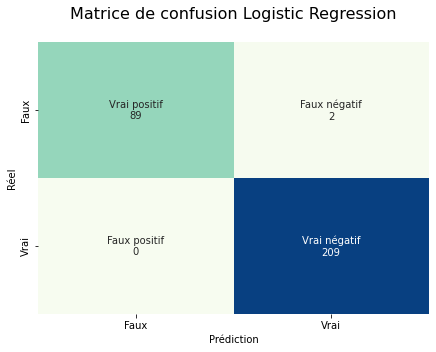

In [24]:
# évaluation

cf_matrix_logistic = confusion_matrix(y_test, y_pred_lor)

nom = ['Vrai positif', 'Faux négatif', 'Faux positif', 'Vrai négatif']
chiffre = ['{0:0.0f}'.format(i) for i in cf_matrix_logistic.flatten()]
labels = [f"{n}\n{c}" for n, c in zip(nom, chiffre)]
labels = np.asarray(labels).reshape(2,2)

figure = plt.figure(figsize=(7,5))
plt.title('Matrice de confusion Logistic Regression\n', size = 16)
sns.heatmap(confusion_matrix(y_test, y_pred_lor), annot = labels, fmt = '',cmap = 'GnBu',
            cbar = False, xticklabels = ["Faux","Vrai"], yticklabels=["Faux","Vrai"])
plt.xlabel('Prédiction')
plt.ylabel('Réel');

In [25]:
# Classification report

print(classification_report(y_test, y_pred_lor))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99        91
        True       0.99      1.00      1.00       209

    accuracy                           0.99       300
   macro avg       1.00      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



<h2><span style="color:cornflowerblue"> 5. Test de l'algorithme </span></h2>

### Test avec données fournies

In [26]:
# Chargement des données

data_prediction = pd.read_csv('billets_production.csv', sep=',')
data_prediction

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [27]:
# Prédiction

data_prediction['prediction'] = lor.predict(scaler.fit_transform(data_prediction.loc[:,'diagonal':'length']))
data_prediction

,diagonal,height_left,height_right,margin_low,margin_up,length,id,prediction
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True


### Test live

In [ ]:
# Chargement des données

df = pd.read_csv(' ', sep=',')
df

In [ ]:
# Prédiction

df['prediction'] = lor.predict(scaler.fit_transform(df.loc[:,'diagonal':'length']))
df

<h2><span style="color:cornflowerblue"> 6. Oversampling ? </span></h2>

In [28]:
# Oversampling

ro = RandomOverSampler()
x_ro, y_ro = ro.fit_resample(x_norm, data_norm.is_genuine)

print('RandomOverSampler :',"\n",y_ro.value_counts())

RandomOverSampler : 
 True     1000
False    1000
Name: is_genuine, dtype: int64


In [29]:
# Séparation des données

x_train_ro, x_test_ro, y_train_ro, y_test_ro = train_test_split(x_ro, y_ro, test_size=0.2, random_state = 712)

In [30]:
# kmeans
kmeans_ro = KMeans(n_clusters = 2, random_state = 0)
kmeans_ro.fit(x_train_ro)

y_pred_kmeans_ro = kmeans_ro.predict(x_test_ro)

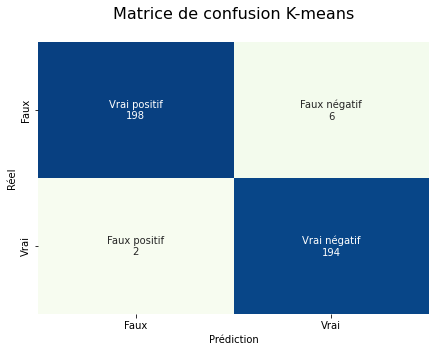

In [31]:
# évaluation

cf_matrix_kmeans = confusion_matrix(y_test_ro, y_pred_kmeans_ro)

nom = ['Vrai positif', 'Faux négatif', 'Faux positif', 'Vrai négatif']
chiffre = ['{0:0.0f}'.format(i) for i in cf_matrix_kmeans.flatten()]
labels = [f"{n}\n{c}" for n, c in zip(nom, chiffre)]
labels = np.asarray(labels).reshape(2,2)

figure = plt.figure(figsize=(7,5))
plt.title('Matrice de confusion K-means\n', size = 16)
sns.heatmap(confusion_matrix(y_test_ro, y_pred_kmeans_ro), annot = labels, fmt = '',cmap = 'GnBu',
            cbar = False, xticklabels = ["Faux","Vrai"], yticklabels=["Faux","Vrai"])
plt.xlabel('Prédiction')
plt.ylabel('Réel');

In [32]:
# Classification report

print(classification_report(y_test_ro, y_pred_kmeans_ro))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98       204
        True       0.97      0.99      0.98       196

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [33]:
# Logistic Regression Oversampling

lor_ro = LogisticRegression()
lor_ro.fit(x_train_ro, y_train_ro)

y_pred_ro = lor_ro.predict(x_test_ro)

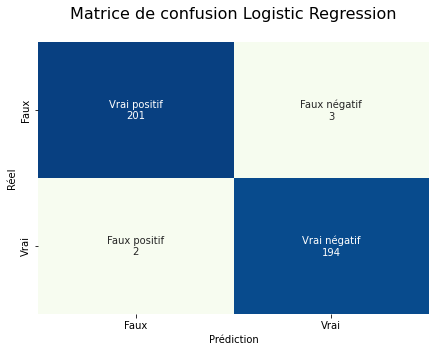

In [34]:
# évaluation Logistic Regression Oversampling

cf_matrix_logistic = confusion_matrix(y_test_ro, y_pred_ro)

nom = ['Vrai positif', 'Faux négatif', 'Faux positif', 'Vrai négatif']
chiffre = ['{0:0.0f}'.format(i) for i in cf_matrix_logistic.flatten()]
labels = [f"{n}\n{c}" for n, c in zip(nom, chiffre)]
labels = np.asarray(labels).reshape(2,2)

figure = plt.figure(figsize=(7,5))
plt.title('Matrice de confusion Logistic Regression\n', size = 16)
sns.heatmap(confusion_matrix(y_test_ro, y_pred_ro), annot = labels, fmt = '',cmap = 'GnBu',
            cbar = False, xticklabels = ["Faux","Vrai"], yticklabels=["Faux","Vrai"])
plt.xlabel('Prédiction')
plt.ylabel('Réel');

In [35]:
# Classification report

print(classification_report(y_test_ro, y_pred_ro))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       204
        True       0.98      0.99      0.99       196

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



<h2><span style="color:cornflowerblue"> 7. ACP ? </span></h2>

### ACP 2 components

In [36]:
from sklearn.decomposition import PCA

# PCA

model_2 = PCA(n_components = 2)
pca_2 = model_2.fit_transform(data_norm.drop('is_genuine', axis = 1))

La part de variance expliquée par pca 1 est  0.43
La part de variance expliquée par pca 2 est  0.17


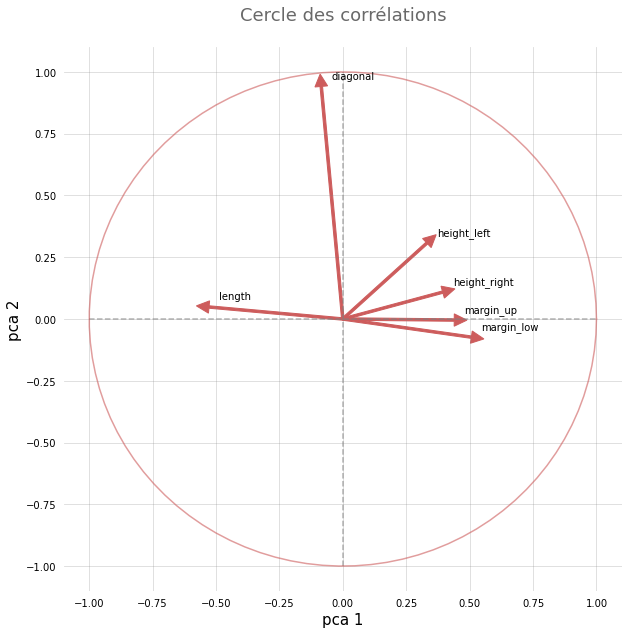

In [37]:
# Corrélation des variables

fig = plt.figure(figsize = (10,10))

plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.title("Cercle des corrélations\n", fontsize = 18, color ='dimgray')

for i in range (model_2.components_.shape[1]) :
    plt.arrow(0, 0, model_2.components_[0,i], model_2.components_[1,i], 
              head_width = 0.05, head_length = 0.05, width = 0.01, color = 'indianred')
    plt.text(model_2.components_[0, i]+0.04, model_2.components_[1, i]+0.03, data_norm.columns[i+1], size = 10)
    
plt.plot([-1, 1], [0, 0], color='grey', ls='--', alpha = 0.6)
plt.plot([0, 0], [-1, 1], color='grey', ls='--', alpha = 0.6)
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), color='indianred', 
         alpha = 0.6)

plt.xlabel('pca 1', size = 15)
plt.ylabel('pca 2', size = 15);

print("La part de variance expliquée par pca 1 est ", round(model_2.explained_variance_ratio_[0],2))
print("La part de variance expliquée par pca 2 est ", round(model_2.explained_variance_ratio_[1],2))

### K-means - ACP2

In [38]:
# Séparation des données

x_train_acp2, x_test_acp2, y_train_acp2, y_test_acp2 = train_test_split(pca_2, data_norm.is_genuine, test_size=0.2, random_state = 712)

In [39]:
# kmeans
kmeans_acp2 = KMeans(n_clusters = 2, random_state = 0)
kmeans_acp2.fit(x_train_acp2)

y_pred_kmeans_acp2 = kmeans_acp2.predict(x_test_acp2)

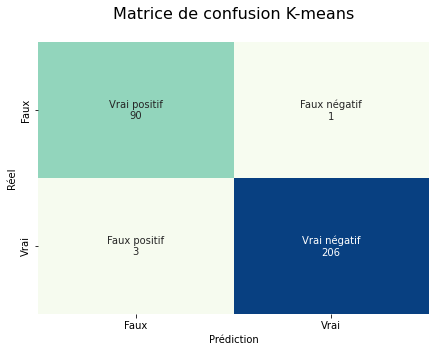

In [40]:
# évaluation

cf_matrix_kmeans = confusion_matrix(y_test_acp2, y_pred_kmeans_acp2)

nom = ['Vrai positif', 'Faux négatif', 'Faux positif', 'Vrai négatif']
chiffre = ['{0:0.0f}'.format(i) for i in cf_matrix_kmeans.flatten()]
labels = [f"{n}\n{c}" for n, c in zip(nom, chiffre)]
labels = np.asarray(labels).reshape(2,2)

figure = plt.figure(figsize=(7,5))
plt.title('Matrice de confusion K-means\n', size = 16)
sns.heatmap(confusion_matrix(y_test_acp2, y_pred_kmeans_acp2), annot = labels, fmt = '',cmap = 'GnBu',
            cbar = False, xticklabels = ["Faux","Vrai"], yticklabels=["Faux","Vrai"])
plt.xlabel('Prédiction')
plt.ylabel('Réel');

In [41]:
# Classification report

print(classification_report(y_test_acp2, y_pred_kmeans_acp2))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98        91
        True       1.00      0.99      0.99       209

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.98       300
weighted avg       0.99      0.99      0.99       300



### Logistric Regression - ACP2

In [42]:
# Logistic Regression Oversampling

lor_acp2 = LogisticRegression()
lor_acp2.fit(x_train_acp2, y_train_acp2)

y_pred_acp2 = lor_acp2.predict(x_test_acp2)

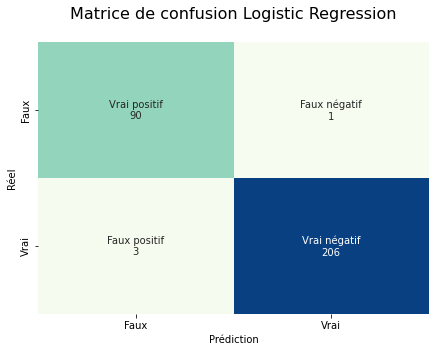

In [43]:
# évaluation Logistic Regression Oversampling

cf_matrix_logistic = confusion_matrix(y_test_acp2, y_pred_acp2)

nom = ['Vrai positif', 'Faux négatif', 'Faux positif', 'Vrai négatif']
chiffre = ['{0:0.0f}'.format(i) for i in cf_matrix_logistic.flatten()]
labels = [f"{n}\n{c}" for n, c in zip(nom, chiffre)]
labels = np.asarray(labels).reshape(2,2)

figure = plt.figure(figsize=(7,5))
plt.title('Matrice de confusion Logistic Regression\n', size = 16)
sns.heatmap(confusion_matrix(y_test_acp2, y_pred_acp2), annot = labels, fmt = '',cmap = 'GnBu',
            cbar = False, xticklabels = ["Faux","Vrai"], yticklabels=["Faux","Vrai"])
plt.xlabel('Prédiction')
plt.ylabel('Réel');

In [44]:
# Classification report

print(classification_report(y_test_acp2, y_pred_acp2))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98        91
        True       1.00      0.99      0.99       209

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.98       300
weighted avg       0.99      0.99      0.99       300



### ACP 3 components

In [45]:
# PCA

model_3 = PCA(n_components = 3)
pca_3 = model_3.fit_transform(data_norm.drop('is_genuine', axis = 1))

La part de variance expliquée par pca 1 est  0.43
La part de variance expliquée par pca 2 est  0.17
La part de variance expliquée par pca 3 est  0.13


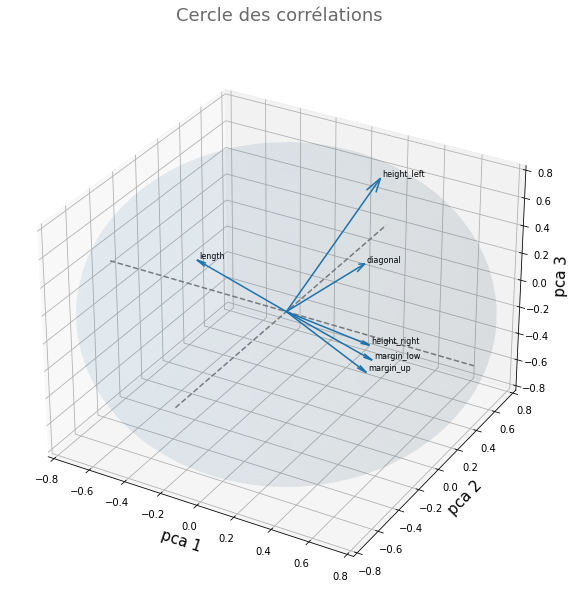

In [46]:
# Corrélation des variables

fig = plt.figure(figsize = (15,10))

ax = fig.add_subplot(111, projection='3d')
plt.grid('whitegrid', color ='gray', alpha = 0.3)
plt.box(False)
plt.tick_params(bottom=False, left=False)
plt.title("Cercle des corrélations\n", fontsize = 18, color ='dimgray')

ax.set_xlim([-0.8,0.8])
ax.set_ylim([-0.8,0.8])
ax.set_zlim([-0.8,0.8])

for i in range (model_3.components_.shape[1]) :
    ax.quiver(0,0,0, model_3.components_[0,i], model_3.components_[1,i], model_3.components_[2,i],
              arrow_length_ratio = 0.1)
    ax.text(model_2.components_[0, i], model_2.components_[1, i]+0.02, model_3.components_[2,i], 
             data_norm.columns[i+1], size = 8)
    
plt.plot([-1, 1, 1], [0, 0, 0], color='grey', ls='--')
plt.plot([0, 0, 0], [-1, 1, 1], color='grey', ls='--')
ax.plot_surface(np.outer(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, np.pi, 100))),
                np.outer(np.sin(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, np.pi, 100))),
                np.outer(np.ones(np.size(np.linspace(0, 2 * np.pi, 100))), np.cos(np.linspace(0, np.pi, 100))),
                alpha = 0.05)
    
ax.set_xlabel('pca 1', size = 15)
ax.set_ylabel('pca 2', size = 15)
ax.set_zlabel('pca 3', size = 15);

print("La part de variance expliquée par pca 1 est ", round(model_3.explained_variance_ratio_[0],2))
print("La part de variance expliquée par pca 2 est ", round(model_3.explained_variance_ratio_[1],2))
print("La part de variance expliquée par pca 3 est ", round(model_3.explained_variance_ratio_[2],2))

### K-means - ACP3

In [47]:
# Séparation des données

x_train_acp3, x_test_acp3, y_train_acp3, y_test_acp3 = train_test_split(pca_3, data_norm.is_genuine, test_size=0.2, random_state = 712)

In [48]:
# kmeans
kmeans_acp3 = KMeans(n_clusters = 2, random_state = 0)
kmeans_acp3.fit(x_train_acp3)

y_pred_kmeans_acp3 = kmeans_acp3.predict(x_test_acp3)

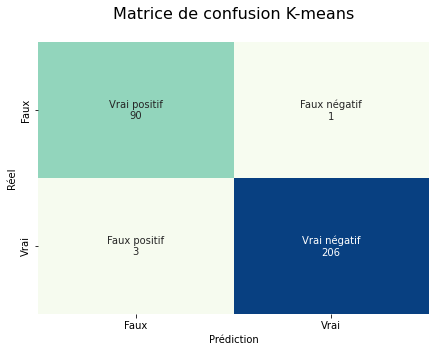

In [49]:
# évaluation

cf_matrix_kmeans = confusion_matrix(y_test_acp3, y_pred_kmeans_acp3)

nom = ['Vrai positif', 'Faux négatif', 'Faux positif', 'Vrai négatif']
chiffre = ['{0:0.0f}'.format(i) for i in cf_matrix_kmeans.flatten()]
labels = [f"{n}\n{c}" for n, c in zip(nom, chiffre)]
labels = np.asarray(labels).reshape(2,2)

figure = plt.figure(figsize=(7,5))
plt.title('Matrice de confusion K-means\n', size = 16)
sns.heatmap(confusion_matrix(y_test_acp3, y_pred_kmeans_acp3), annot = labels, fmt = '',cmap = 'GnBu',
            cbar = False, xticklabels = ["Faux","Vrai"], yticklabels=["Faux","Vrai"])
plt.xlabel('Prédiction')
plt.ylabel('Réel');

In [50]:
# Classification report

print(classification_report(y_test_acp3, y_pred_kmeans_acp3))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98        91
        True       1.00      0.99      0.99       209

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.98       300
weighted avg       0.99      0.99      0.99       300



### Logistric Regression - ACP3

In [51]:
# Logistic Regression Oversampling

lor_acp3 = LogisticRegression()
lor_acp3.fit(x_train_acp3, y_train_acp3)

y_pred_acp3 = lor_acp3.predict(x_test_acp3)

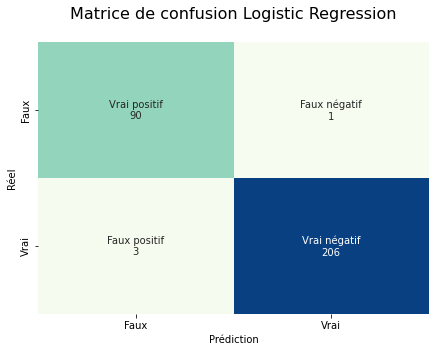

In [52]:
# évaluation Logistic Regression Oversampling

cf_matrix_logistic = confusion_matrix(y_test_acp3, y_pred_acp3)

nom = ['Vrai positif', 'Faux négatif', 'Faux positif', 'Vrai négatif']
chiffre = ['{0:0.0f}'.format(i) for i in cf_matrix_logistic.flatten()]
labels = [f"{n}\n{c}" for n, c in zip(nom, chiffre)]
labels = np.asarray(labels).reshape(2,2)

figure = plt.figure(figsize=(7,5))
plt.title('Matrice de confusion Logistic Regression\n', size = 16)
sns.heatmap(confusion_matrix(y_test_acp3, y_pred_acp3), annot = labels, fmt = '',cmap = 'GnBu',
            cbar = False, xticklabels = ["Faux","Vrai"], yticklabels=["Faux","Vrai"])
plt.xlabel('Prédiction')
plt.ylabel('Réel');

In [53]:
# Classification report

print(classification_report(y_test_acp3, y_pred_acp3))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98        91
        True       1.00      0.99      0.99       209

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.98       300
weighted avg       0.99      0.99      0.99       300

